In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
from tools_plot import regplot
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import pandas as pd
import numpy as np
import quantities as pq
import seaborn as sns
import copy
from IPython.display import display
import statsmodels.api as sm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
sys.path.append('..')
from tools_plot import savefig, fix_figure, despine, set_style, add_caption

In [3]:
# analys = pd.read_csv('results/orig_analysis/params_1_analyse_30000.csv')
# all_data = pd.read_csv('results/params_1_analyse_30000.csv')
all_data = pd.read_csv('../results/params_test_analyse_30000.csv')

In [4]:
N_pairs = all_data.shape[0]
analys = all_data.query("pfast < 0.01 and ppeak < 0.01 and hit_rate < 0.9")
# analys = all_data.query("stim_amp > 1")

# Goodness of fit

In [5]:
w = analys.query("weight >= 0").sort_values('weight').reset_index(drop=True)

/home/mikkel/.virtualenvs/main/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


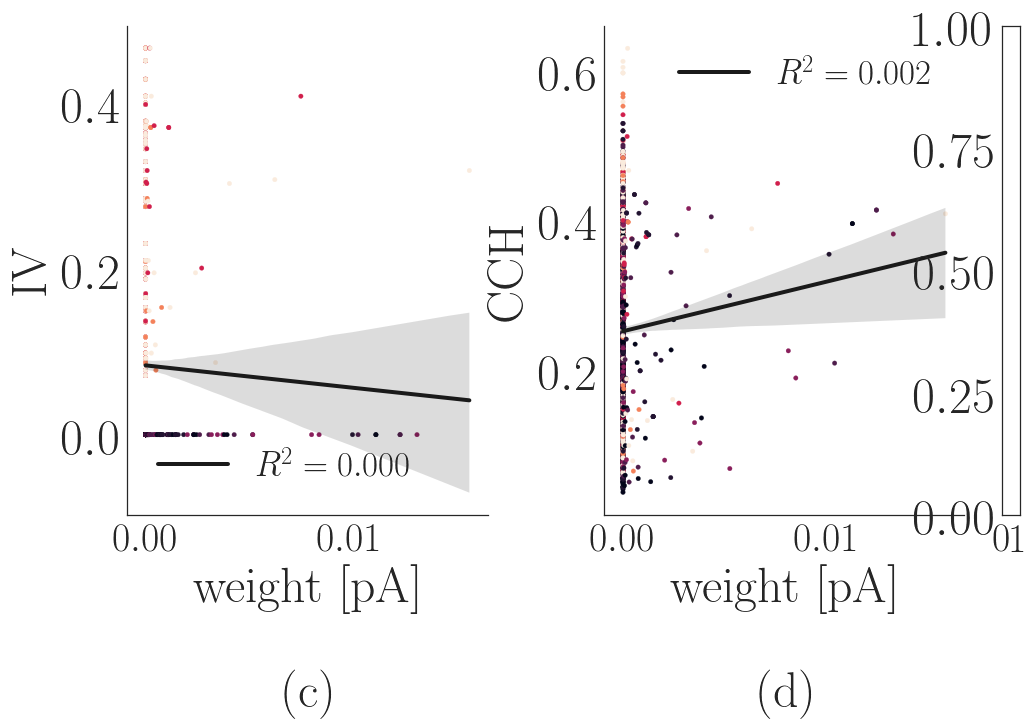

In [8]:
save = False

if save: 
    set_style('article')
    dot_size = 3
if not save: 
    set_style('notebook')
    dot_size = 20
model = sm.OLS
ci = 95.

fig = plt.figure()
gs = GridSpec(1, 2, width_ratios=[1, 1.15], wspace=.3)
gs0 = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0, 1], width_ratios=[1,.05])
ax_iv = plt.subplot(gs[0, 0])
ax_cch = plt.subplot(gs0[0, 0])
ax_c = plt.subplot(gs0[0, 1])
axs = [ax_iv, ax_cch, ax_c]
wald = regplot(
    x='weight', y='iv', data=w, scatter_color=w['stim_amp'],
    model=model, ci=ci, ax=ax_iv, colorbar=False,
    xlabel='weight [pA]', ylabel='IV', scatter_kws={'s': dot_size})

cch = regplot(x='weight', y='cch', data=w, scatter_color=w['stim_amp'], 
             model=model, ci=ci, ax=ax_cch, clabel='Stimulation [pA]', cax=ax_c,
             xlabel='weight [pA]', ylabel='CCH', scatter_kws={'s': dot_size})
despine(ax=(ax_iv, ax_cch))

for ax, res in zip([ax_iv, ax_cch], [wald, cch]):
    h = plt.Line2D([], [], label='$R^2 = {:.3f}$'.format(res.rsquared), ls='-', color='k')
    ax.legend(handles=[h])
#     ax.set_xticks([0, 0.5, 1.])
# ax_cch.set_yticks([0.0, .2, .4])
add_caption(axs[:-1], vspace=2, start='c')
if save: savefig(fig, 'goodness_fit', bbox_inches='tight')

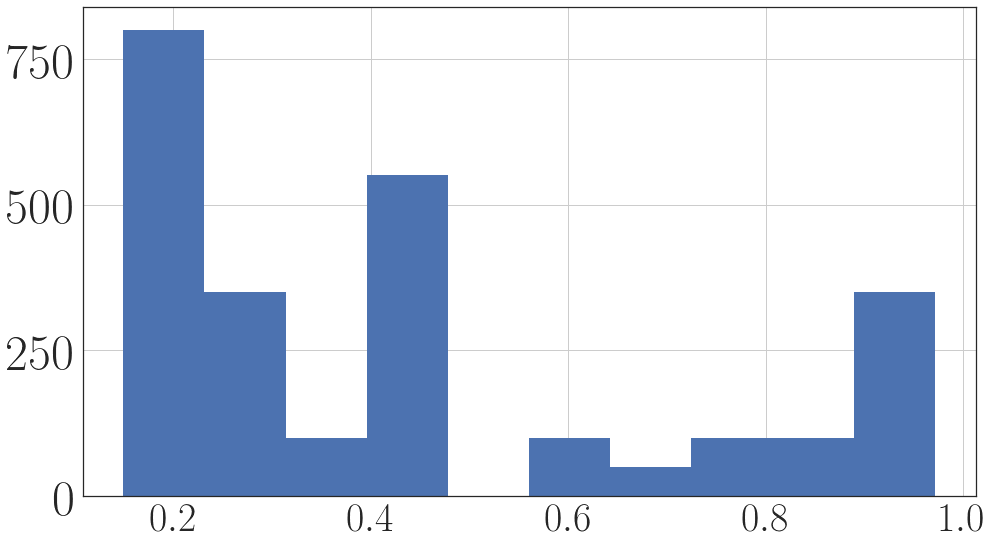

In [8]:
all_data.hit_rate.hist()

In [26]:
wald.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           wald$_{cut}$   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.104e+04
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:57:47   Log-Likelihood:                 50695.
No. Observations:               21149   AIC:                        -1.014e+05
Df Residuals:                   21147   BIC:                        -1.014e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0129      0.000     77.068      0.000       0.013       0.013
x1             0.1383      0.001    105.090      0.000       0.136       0.141
==============================================================================
Omnibus:                     8060.148   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57637.098
Skew:                           1.659   Prob(JB):                         0.00
Kurtosis:                      10.375   Cond. No.                         8.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logit   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     439.5
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           1.32e-96
Time:                        12:57:47   Log-Likelihood:                 2483.6
No. Observations:               21149   AIC:                            -4963.
Df Residuals:                   21147   BIC:                            -4947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4702      0.002    287.749      0.000       0.467       0.473
x1             0.2697      0.013     20.965      0.000       0.244       0.295
==============================================================================
Omnibus:                     5974.988   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              964.621
Skew:                           0.068   Prob(JB):                    3.43e-210
Kurtosis:                       1.963   Cond. No.                         8.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
cch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cch$_{ptrans}$   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     276.7
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           9.78e-62
Time:                        12:57:48   Log-Likelihood:                 10028.
No. Observations:               21149   AIC:                        -2.005e+04
Df Residuals:                   21147   BIC:                        -2.004e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2208      0.001    193.062      0.000       0.219       0.223
x1             0.1498      0.009     16.634      0.000       0.132       0.167
==============================================================================
Omnibus:                     2502.366   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.230
Skew:                           0.205   Prob(JB):                    2.08e-173
Kurtosis:                       2.143   Cond. No.                         8.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""